### Creating Features

In [1]:
import numpy as np
import pandas as pd

sales_df = pd.read_csv('../01_Supervised_Learning/Data/advertising_and_sales_clean.csv')
# Create X from the radio column's values
X = sales_df['radio'].values
# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model


In [2]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions =reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualizing a linear regression model

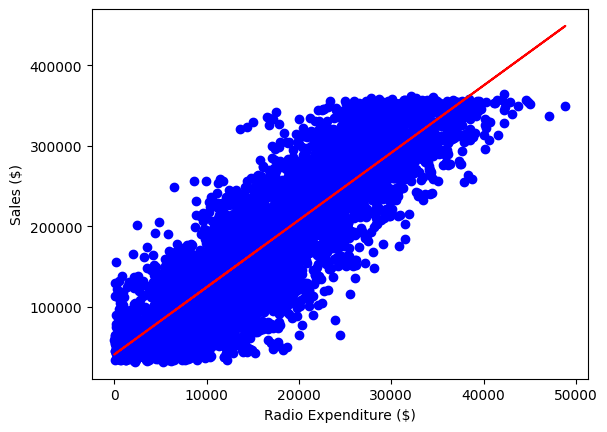

In [3]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

### Fit and predict for regression

In [6]:
from sklearn.model_selection import train_test_split

# One-hot encode categorical columns (fix for ValueError)
X = pd.get_dummies(sales_df.drop("sales", axis=1)).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


Predictions: [53135.43066453 71060.6004603 ], Actual Values: [55261.28 67574.9 ]


### Regression performance


In [8]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))


R^2: 0.9990150033349248
RMSE: 2944.742849931021


### Cross-validation for R-squared

In [9]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)


[0.99893896 0.99909078 0.99900929 0.99896318 0.99889195 0.99903855]


### Analyzing cross-validation metrics

In [10]:
cv_results = cv_scores

# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))


0.9989887858587477
6.559306063470636e-05
[0.99889783 0.99908425]


### Regularized regression: Ridge

In [11]:
# Import Ridge
from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)

print(ridge_scores)


[0.9990150033934493, 0.9990150039191462, 0.9990150090764298, 0.9990150521414333, 0.999015182881188, 0.9990152130441597]


### Lasso regression for feature importance

In [14]:
# Drop target and one-hot encode categorical columns
X = pd.get_dummies(sales_df.drop("sales", axis=1), drop_first=True)

# Extract target
y = sales_df["sales"].values

# Store updated column names
sales_columns = X.columns


[ 3.56256515e+00 -3.91091926e-03  4.48078397e-03  1.16454543e+01
 -5.44648001e+01 -7.14675024e+01]


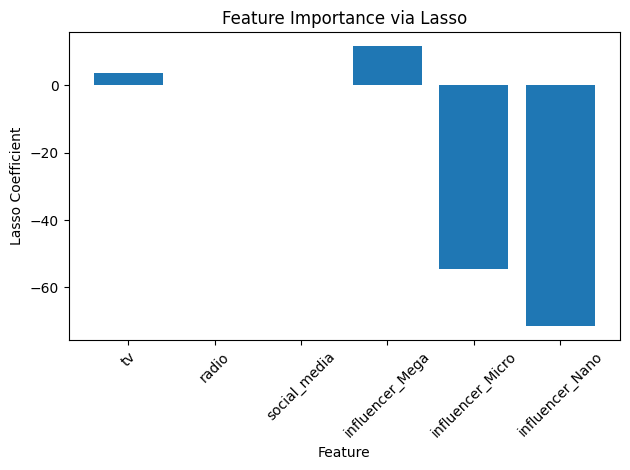

In [15]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate and fit model
lasso = Lasso(alpha=0.3)
lasso.fit(X, y)

# Get coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Lasso Coefficient")
plt.title("Feature Importance via Lasso")
plt.tight_layout()
plt.show()
